# Machine Learning
Classification ML: Decision Tree and Support Vector Machines (SVM)

Data Must be preped for Algorithm to run smoothly 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset from Seaborn package
#look at the shape of the dataset i.e. rows and columns

df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [3]:
#review the column names amount of data and types of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
#Pull a list of all columns with null values and the amount of null values in each column

null_counts = df.isnull().sum()
null_counts[null_counts > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [5]:
#deck has too many null values to fill by using any type of educated guess
#drop this column from the data set all together

df = df.drop('deck', axis=1)

In [6]:
#use the context of the data to determine and fill the surrounding null values for age

df['age'] = df['age'].interpolate()

In [7]:
#Because these columns seems to be dependent on eachother we may be able to impute the correct data
#Let's pull the rows with null values to see

df1 = df[df.isna().any(axis=1)]
print(df1)

     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male embark_town alive  alone  
61   woman       False         NaN   yes   True  
829  woman       False         NaN   yes   True  


In [8]:
#Unfortunately we will not be able to impute the data as each row is missing both values
#We will use the mode to impute the data for these 4 null values
# We will find the mode by using the following code:

print(df['embarked'].mode())
print(df['embark_town'].mode())

0    S
dtype: object
0    Southampton
dtype: object


In [9]:
#Fill the null values with the mode

df['embarked'] = df['embarked'].fillna('S')
df['embark_town'] = df['embark_town'].fillna('Southampton')

In [10]:
#Double check to make sure null values are filled

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
#Most ML Models do not process or do well processing string data
#Remove string data types and rename the new dataset that contains all numeric and boolean values

df1 = df.drop(['sex', 'embarked','who', 'embark_town','alive', 'class'], axis=1)

# Decision Tree Algorithm

In [12]:
#import the package algorithm from the sklearn package
#import the train test split package from sklearn in order to train the model by using just a portion of your data

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [13]:
#define the classification variable (what you are tryign to predict)
#For our model we are trying to predict who died on the titanic
#We hide the answer from the model by creating a new dataset (X) by dropping the survived column 
#We create an answer key in order to verify how our model performs by storing the answers in the dataset labeled 'y'

X = df1.drop('survived', axis=1)
y = df1['survived']

In [14]:
#The code below is the standard syntax for splitting and training the model
#You can play with the test_size to increase or decrease the amount of data you want to use to train and test
#The amount provided is the percent of data you will be testing your model on and the remainder is what is used to train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
#Create a variable to predict the test data

y_pred = classifier.predict(X_test)

In [16]:
#The confusion matrix shows the number of corect predictions as well as the number of inaccurate predictions 
#Flase Positives are indicated in the upper right (31): These are predicted 0 (died) but they actually survived
#False Negatives are indicated in the lower left (34): These are predicted 1 (survived) but they actually died

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Percision indicates how good our model is based on the total positives predicted
#Recall indicates how good our model is based on the actual positives predicted
#F1 is calculated based on a complex average of Recall and Percision (don't bother with it here)

#A Basic accuracy will suit us just fine in regard to our discussion here which is roughly 75-80% when using a 70/30 split

[[142  25]
 [ 37  64]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       167
           1       0.72      0.63      0.67       101

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



In [17]:
#A decision tree is very easy to understand as it uses a basic pattern for making decisions
#As each decision is made the model creates branches in order to make more refined decisions
#We can view the model of the decision tree and see how our model was able to make the predictions it made

#To look at the math and a basic breakdown of the tree structure you can use the tree.plot_tree function in sklearn:

[Text(2519.171195652174, 4234.357894736842, 'X[5] <= 0.5\ngini = 0.474\nsamples = 623\nvalue = [382, 241]'),
 Text(883.6684782608695, 4005.4736842105267, 'X[0] <= 2.5\ngini = 0.412\nsamples = 252\nvalue = [73, 179]'),
 Text(512.1739130434783, 3776.5894736842106, 'X[4] <= 149.035\ngini = 0.098\nsamples = 136\nvalue = [7, 129]'),
 Text(404.3478260869565, 3547.705263157895, 'X[4] <= 28.856\ngini = 0.077\nsamples = 124\nvalue = [5, 119]'),
 Text(350.4347826086956, 3318.821052631579, 'X[4] <= 28.231\ngini = 0.153\nsamples = 60\nvalue = [5, 55]'),
 Text(296.52173913043475, 3089.936842105263, 'X[2] <= 0.5\ngini = 0.126\nsamples = 59\nvalue = [4, 55]'),
 Text(161.7391304347826, 2861.0526315789475, 'X[1] <= 25.5\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(107.82608695652173, 2632.168421052632, 'X[1] <= 23.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(53.91304347826087, 2403.284210526316, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(161.7391304347826, 2403.284210526316

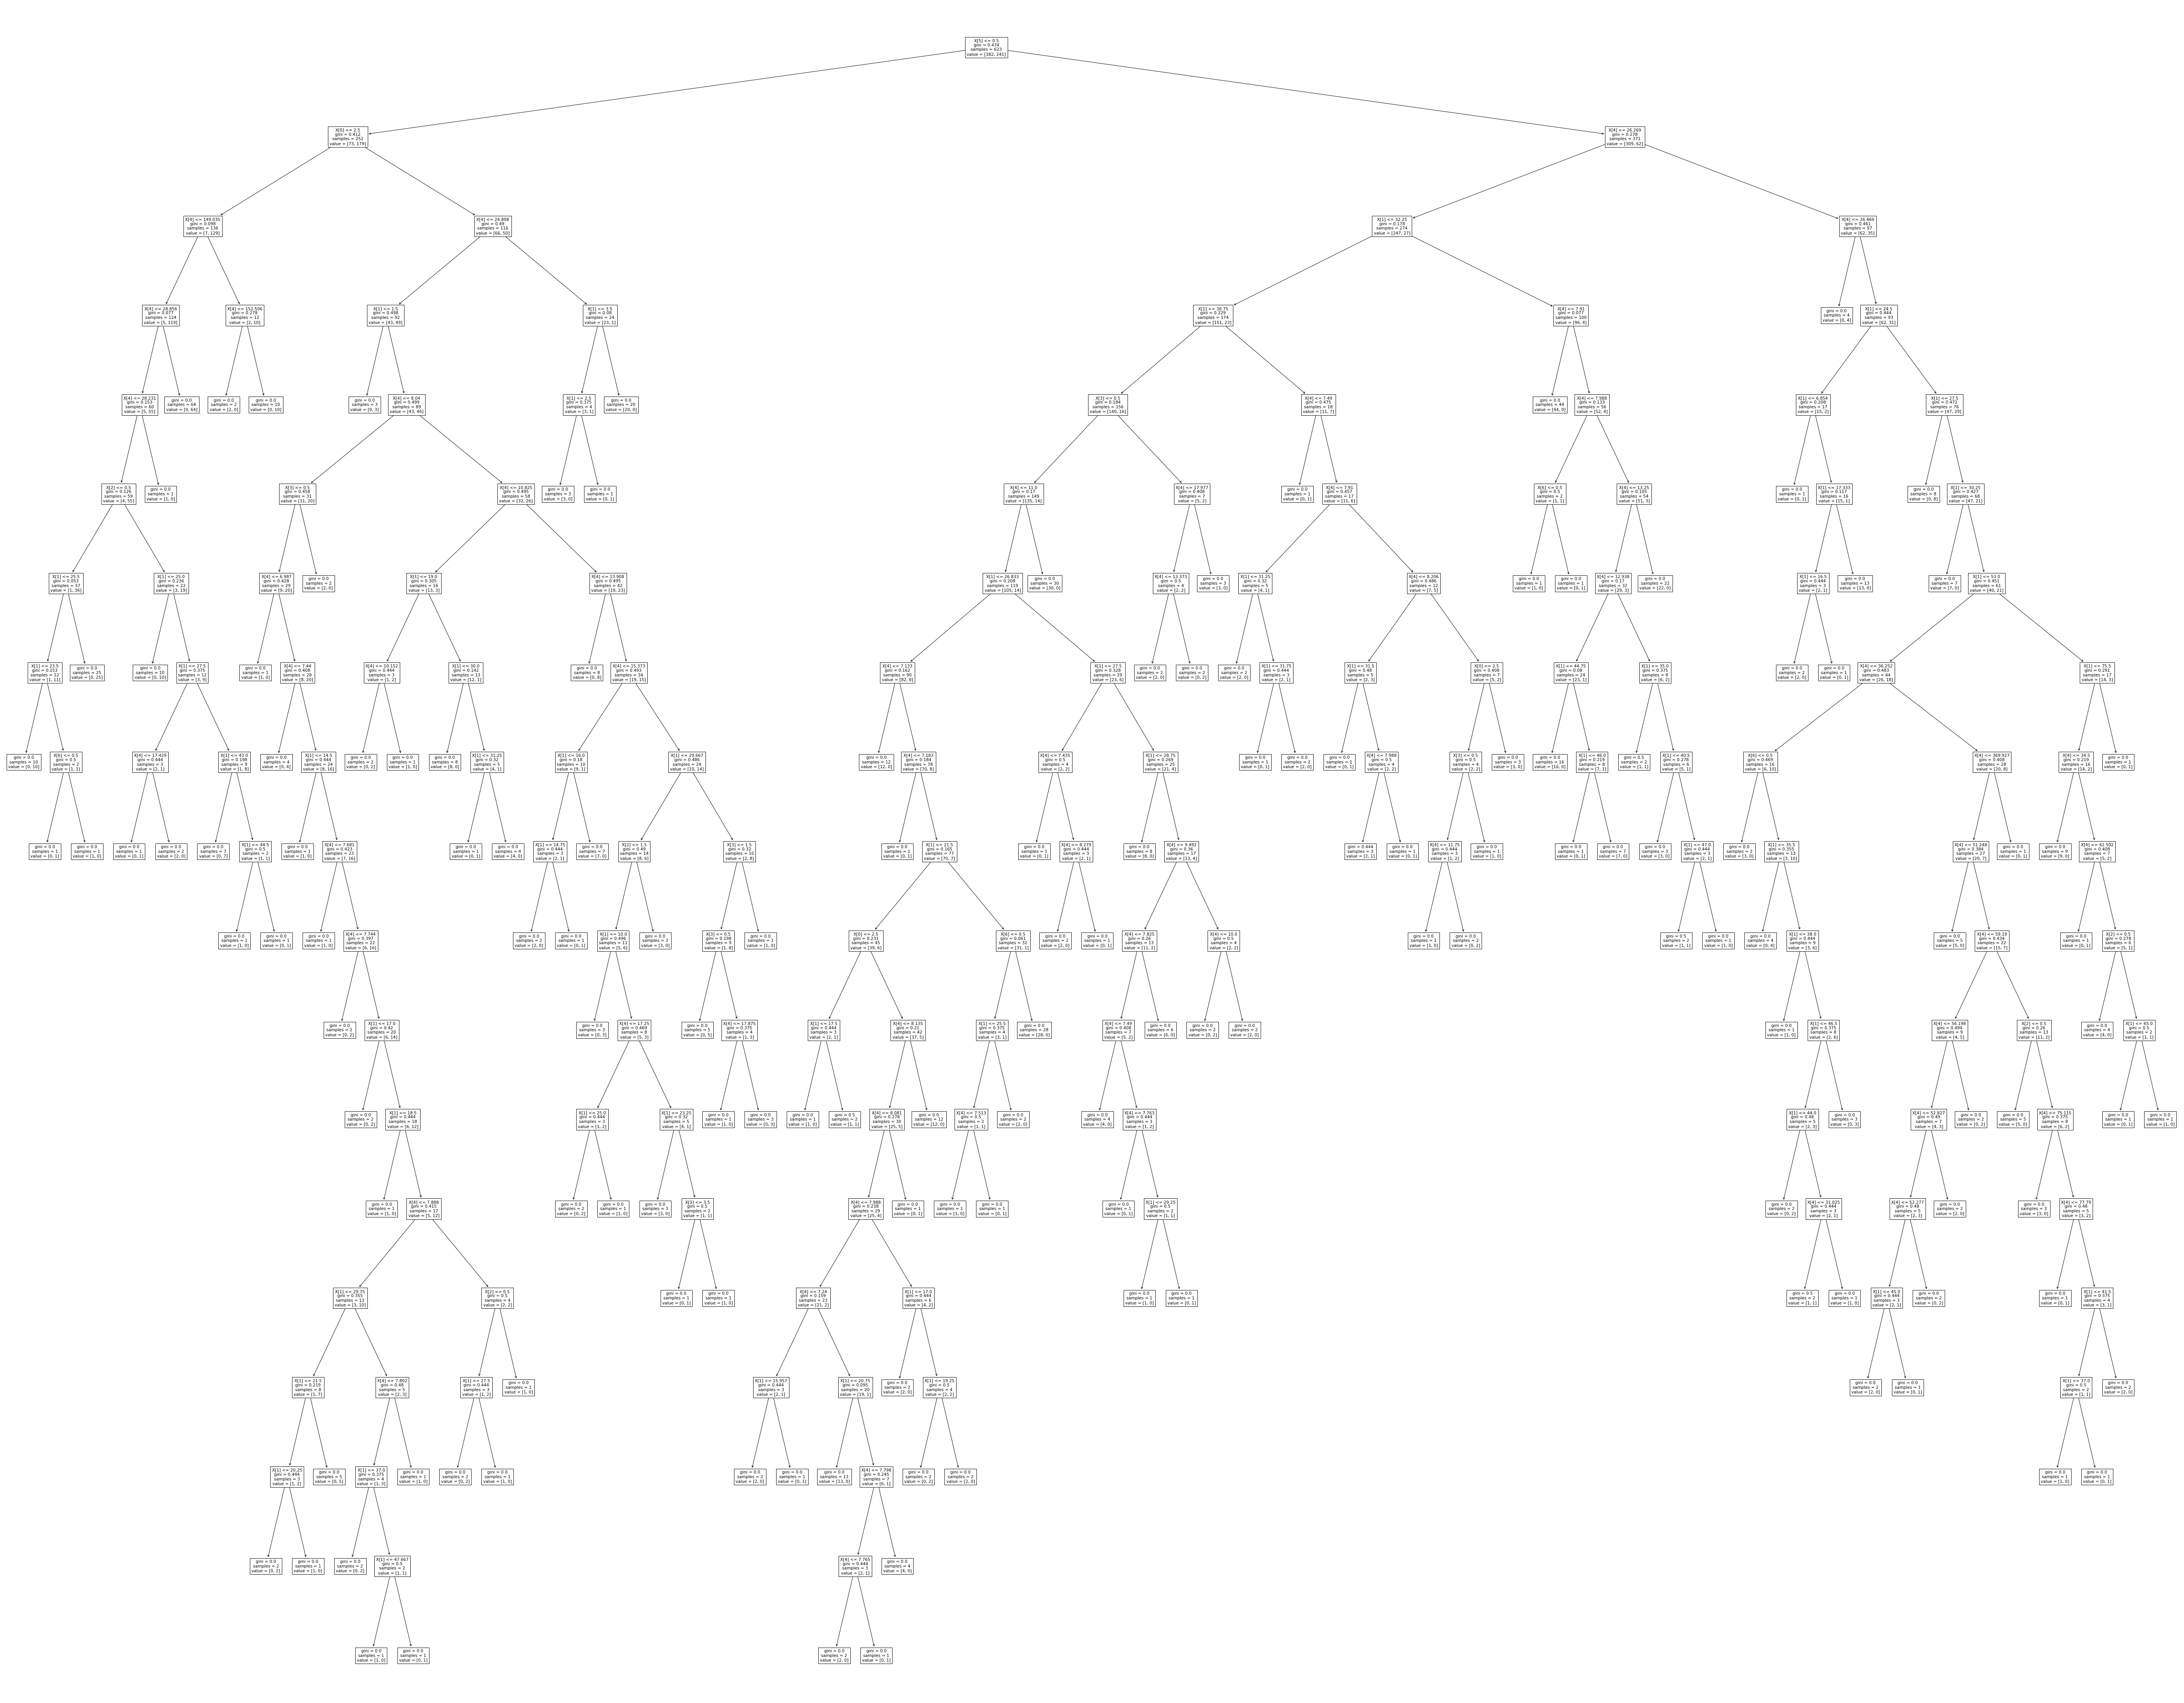

In [56]:
#Take a quick look at the interworkings of the algorithm and the tree itself

fig = plt.figure(figsize=(100,80))
tree.plot_tree(classifier.fit(X_train, y_train))

# SVM
Now that we have the data split and trained we can easily run other ML algorithms such as SVM

In [60]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_pred = svclassifier.predict(X_test)

In [63]:
#SVM is a more complex algorithm that plots and splits our data in the "most" efficient way
#The splitting technique is a sophisticated way of plotting and drawing a line between the 2 types of passengers:
#those who survived and those who died
#This technique is more math heavy compared to our previous decision tree and thus performs much better all around:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[152  15]
 [ 29  72]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       167
           1       0.83      0.71      0.77       101

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268



# Bonus Algorithm: KNN (k nearest neighbor)
KNN is a clustering algorithm that categorizes data into groups: think of your favorite Spotify Radio Station-- its made up of a grouping of similar artists

This is how KNN works it identifies certain traits in the data and groups those traits into a specified group 

***YOU SPECIFIY HOW MANY GROUPS i.e. number of Ks.
This is where the industry knowledge comes into play. For us we know that there were 2 groups: Survived and Died so we will set our K to 2.

In [146]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [147]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141  21]
 [ 68  38]]
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       162
           1       0.64      0.36      0.46       106

    accuracy                           0.67       268
   macro avg       0.66      0.61      0.61       268
weighted avg       0.66      0.67      0.64       268



In [ ]:
#Overall this algorithm has performed very poorly in comparison to our decision tree and SVM algorithms  
#As a rule of thumb anything close to 50% is very bad so this may not be the algorithm for this specific data set 
#However KNN is very powerful and has usecases elsewhere.